In [5]:
# Required Python Packages
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [6]:
# Here we have to load the given car Train Data into dataset and test data into testdata using read
dataset = pd.read_csv("C:/Users/haneesha/Anaconda3/bikeRentalHourlyTrain.csv")
testset = pd.read_csv("C:/Users/haneesha/Anaconda3/bikeRentalHourlyTest.csv")

In [7]:
headers11 = ["instant0","instant","dteday","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]
headers22 = ["instant0","instant","dteday","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [8]:
dataset.columns = headers11
testset.columns = headers22

In [9]:
dataset.head()

,instant0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2480,2481,2011-04-18,2,0,4,6,0,1,1,1,0.40,0.4091,0.82,0.0000,3,51,54
1,4731,4732,2011-07-21,3,0,7,1,0,4,1,2,0.74,0.7273,0.84,0.2239,5,16,21
2,7422,7423,2011-11-10,4,0,11,21,0,4,1,1,0.36,0.3333,0.57,0.2537,6,130,136
3,8588,8589,2011-12-29,1,0,12,15,0,4,1,2,0.30,0.3182,0.52,0.0896,27,150,177
4,16339,16340,2012-11-18,4,1,11,13,0,0,0,1,0.40,0.4091,0.62,0.3284,113,334,447


In [10]:
dataset.shape

(13034, 18)

In [11]:
dataset.drop('casual', axis=1, inplace=True)
dataset.drop('registered', axis=1, inplace=True)
dataset.drop('instant', axis=1, inplace=True)
dataset.drop('dteday', axis=1, inplace=True)

testset.drop('casual', axis=1, inplace=True)
testset.drop('registered', axis=1, inplace=True)
testset.drop('instant', axis=1, inplace=True)
testset.drop('dteday', axis=1, inplace=True)

In [12]:
print(dataset.describe())

           instant0        season            yr          mnth            hr  \
count  13034.000000  13034.000000  13034.000000  13034.000000  13034.000000   
mean    8694.532760      2.501151      0.503222      6.537901     11.524858   
std     5028.696269      1.108358      0.500009      3.440652      6.919784   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%     4329.500000      2.000000      0.000000      4.000000      6.000000   
50%     8709.500000      3.000000      1.000000      7.000000     12.000000   
75%    13069.750000      3.000000      1.000000     10.000000     18.000000   
max    17378.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  13034.000000  13034.000000  13034.000000  13034.000000  13034.000000   
mean       0.028464      3.006982      0.682676      1.425349      0.496873   
std        0.166301      2.006212      0.465453    

In [13]:
headers1 = ["instant0","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]
headers2 = ["instant0","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]

In [14]:
number = preprocessing.LabelEncoder()
for i in headers1:
    dataset[i] = number.fit_transform(dataset[i].astype("str"))

In [15]:
number = preprocessing.LabelEncoder()
for i in headers2:
    testset[i] = number.fit_transform(testset[i].astype("str"))

In [16]:
train_x, train_y = dataset[headers1[1:-1]], dataset[headers1[-1]]
test_x, test_y = testset[headers2[1:-1]], testset[headers2[-1]]

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
regr = linear_model.LinearRegression()

In [19]:
regr.fit(train_x, train_y)
regr.fit(test_x, test_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:

bike_train_pred = regr.predict(train_x)

In [21]:

bike_test_pred = regr.predict(test_x)

In [22]:
residuals = test_y - bike_test_pred

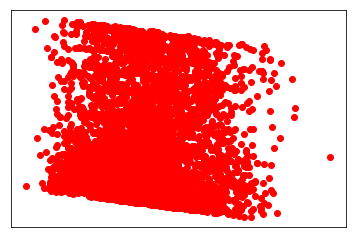

In [23]:
import matplotlib.pyplot as plt
plt.scatter(bike_test_pred, residuals,  color='red')

plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

In [26]:
regrPoly = linear_model.LinearRegression()
regrPoly.fit(train_x_poly, train_y)
bike_train_pred_poly = regrPoly.predict(train_x_poly)
regrPoly.fit(test_x_poly, test_y)
bike_test_pred_poly = regrPoly.predict(test_x_poly)

In [27]:
regrRidge = linear_model.Ridge(alpha = .05)

In [28]:
regrRidge.fit(train_x_poly, train_y)
regrRidge.fit(test_x_poly, test_y)
bike_train_ridge = regrRidge.predict(train_x_poly)
bike_test_ridge = regrRidge.predict(test_x_poly)

In [29]:
from sklearn.model_selection import KFold, cross_val_predict

In [30]:
kf = KFold(n_splits=5, shuffle=True)

In [31]:
kf.get_n_splits(dataset)

5

In [32]:
kf.get_n_splits(testset)

5

In [33]:
kf_prediction = cross_val_predict(regrRidge,dataset.iloc[:, 1: 13],dataset["cnt"])
testkf_ridge_pred = cross_val_predict(regrRidge,testset.iloc[:, 1: 13],testset["cnt"])

In [34]:

print("Mean squared error of test set using k fold: %.2f" % mean_squared_error(testset["cnt"], testkf_ridge_pred))

Mean squared error of test set using k fold: 42480.70


In [35]:
print("Mean squared error of trained set using k fold: %.2f" %mean_squared_error(dataset["cnt"], kf_prediction))

Mean squared error of trained set using k fold: 55869.42


In [36]:
# The mean squared error
print("Mean squared error of train data using ridge without using k fold: %.2f"
      % mean_squared_error(train_y, bike_train_ridge))
# Explained variance score: 1 is perfect prediction
print('Variance score of train data using ridge without using k fold : %.2f' % r2_score(train_y, bike_train_ridge))

Mean squared error of train data using ridge without using k fold: 54911.83
Variance score of train data using ridge without using k fold : 0.02


In [37]:
# The mean squared error
print("Mean squared error of test data using ridge without using k fold: %.2f"
      % mean_squared_error(test_y, bike_test_ridge))
# Explained variance score: 1 is perfect prediction
print('Variance score of test data using ridge without using k fold: %.2f' % r2_score(test_y, bike_test_ridge))

Mean squared error of test data using ridge without using k fold: 39685.84
Variance score of test data using ridge without using k fold: 0.07
